# Using IterationControl to train a tree-booster on the iris data set

In this demonstration we show how to the controls in
[IterationControl.jl](https://github.com/ablaom/IterationControl.jl)
with an iterative
[MLJ](https://github.com/alan-turing-institute/MLJ.jl) model, using
our bare hands. (MLJ will ultimately provide its own canned
`IteratedModel` wrapper to make this more convenient and
compositional.)

In [1]:
using Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

using MLJ
using MLJIteration
using Dates

using Plots
pyplot(size = (600, 300*(sqrt(5) - 1)))


using Statistics
using Random
Random.seed!(123)

MLJ.color_off()

 Activating environment at `~/Dropbox/Julia7/MLJ/MLJIteration/examples/tree_booster/Project.toml`


false

Loading some data and splitting observation indices into test/train:

In [2]:
X, y = make_moons(1000, rng=123)
train, test = MLJ.partition(eachindex(y), 0.7);

Import an model type:

┌ Info: Training Machine{ProbabilisticIteratedModel{EvoTreeClassifier{Float32,…}},…} @502.
└ @ MLJBase /Users/anthony/.julia/packages/MLJBase/pCCd7/src/machines.jl:342
┌ Info: Stop triggered by TimeLimit(Millisecond(30000)) stopping criterion. 
└ @ IterationControl /Users/anthony/.julia/packages/IterationControl/h3s8z/src/stopping_controls.jl:75
┌ Info: Total of 118 iterations. 
└ @ MLJIteration /Users/anthony/Dropbox/Julia7/MLJ/MLJIteration/src/core.jl:52


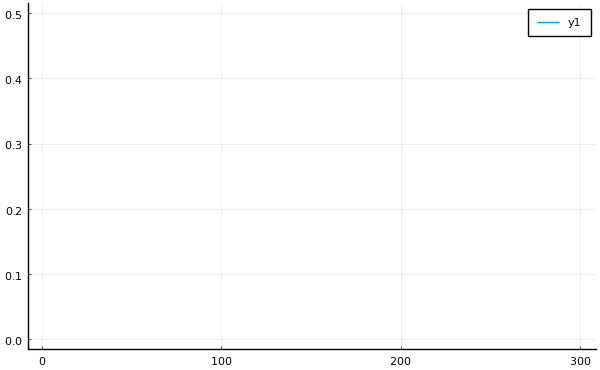

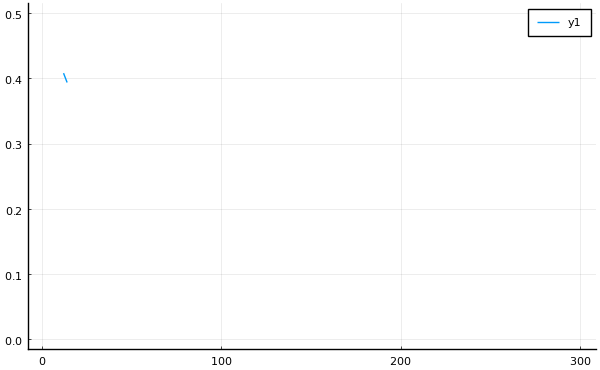

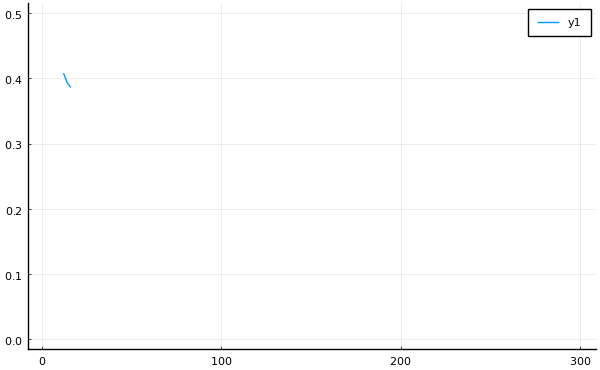

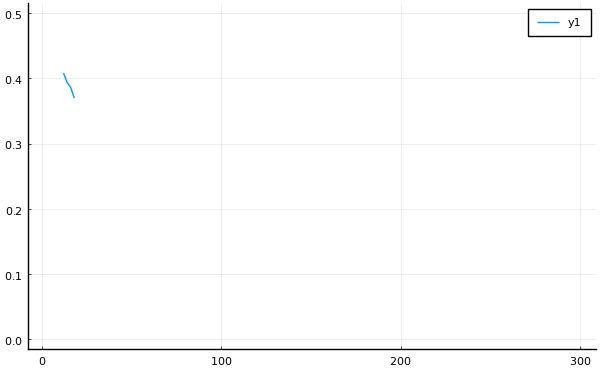

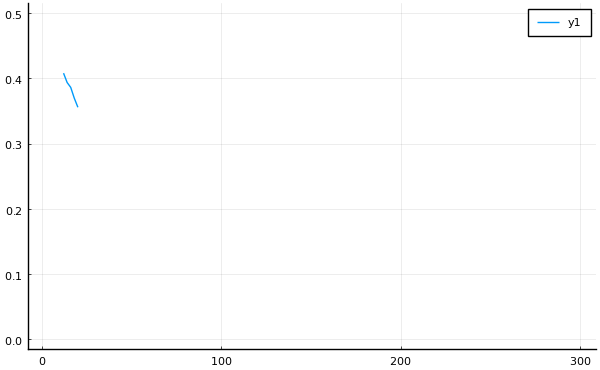

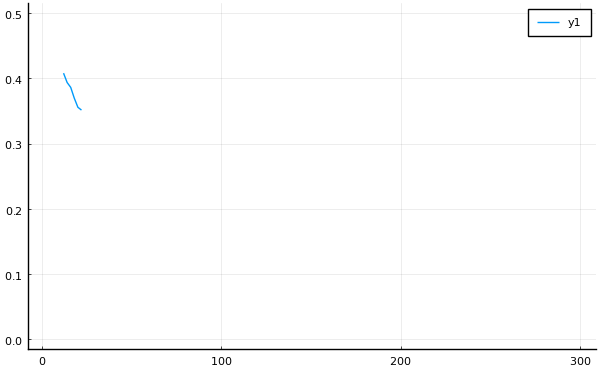

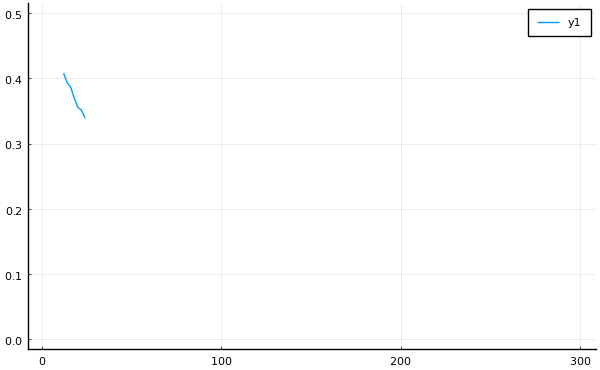

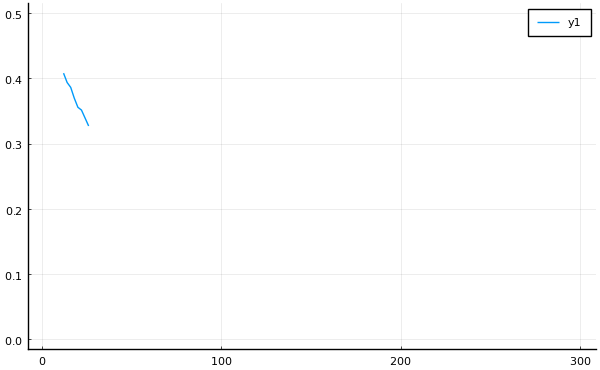

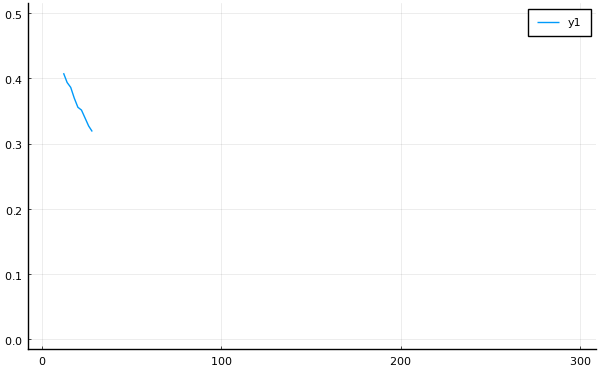

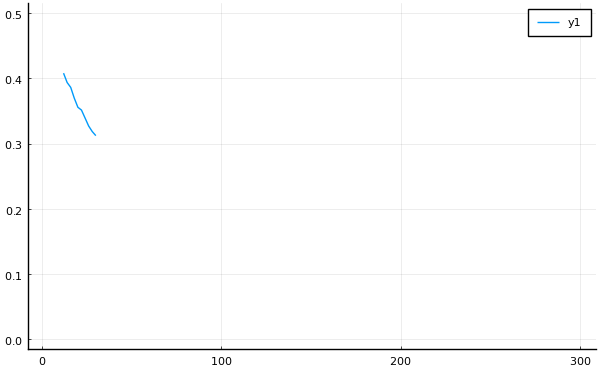

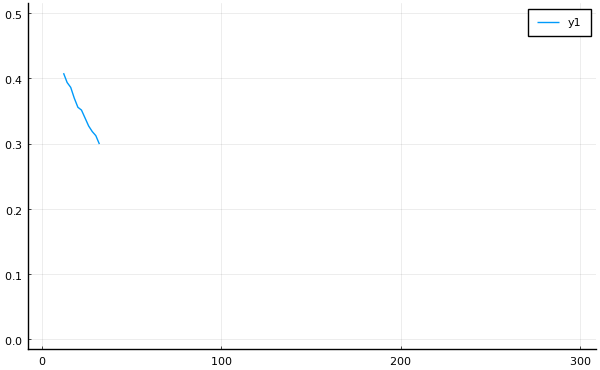

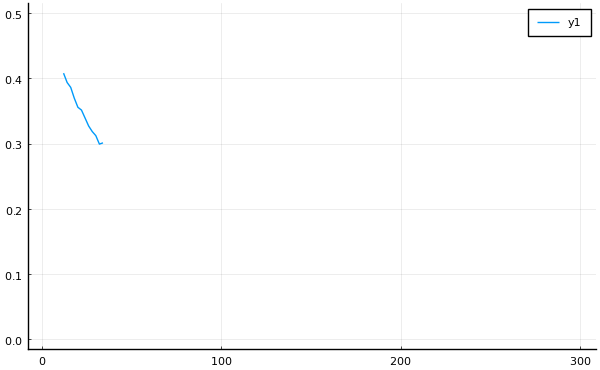

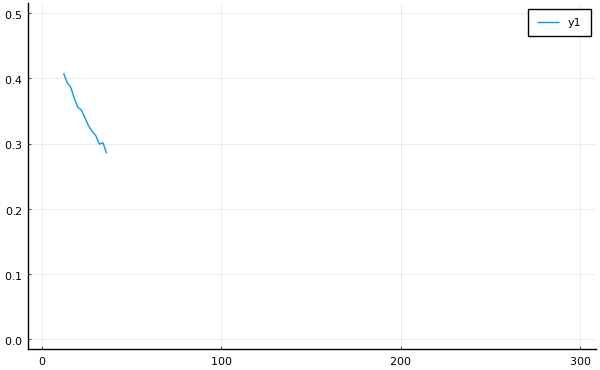

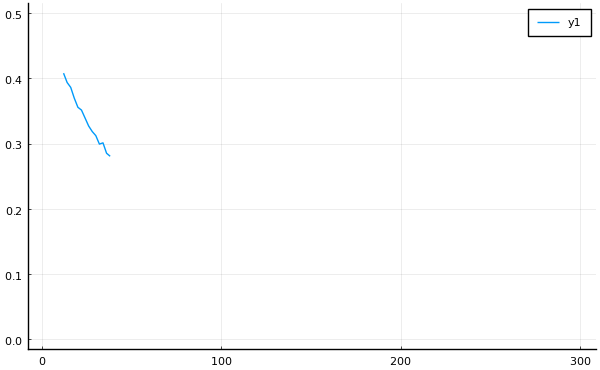

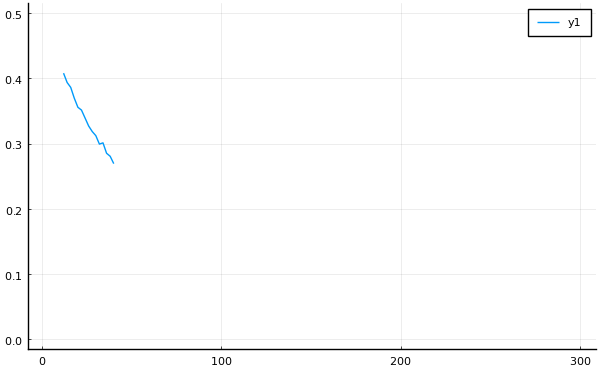

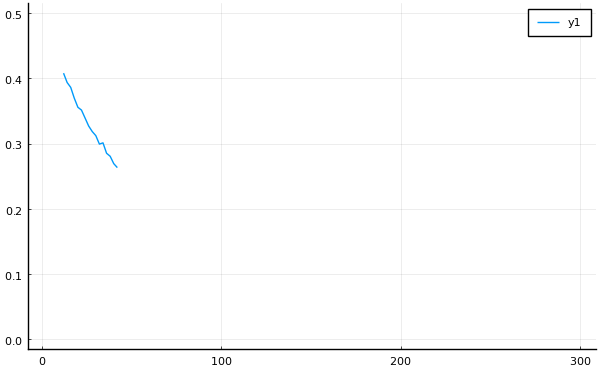

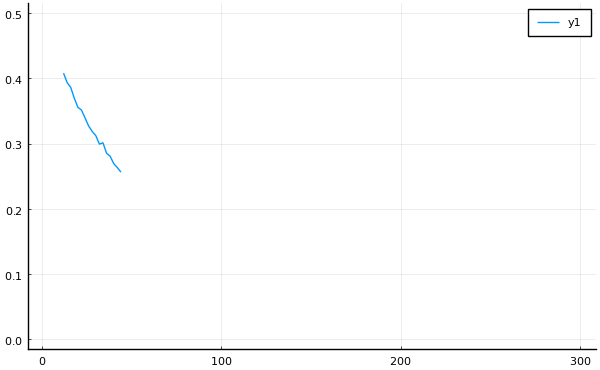

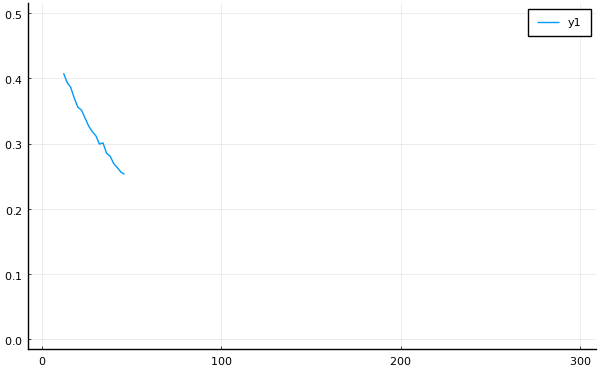

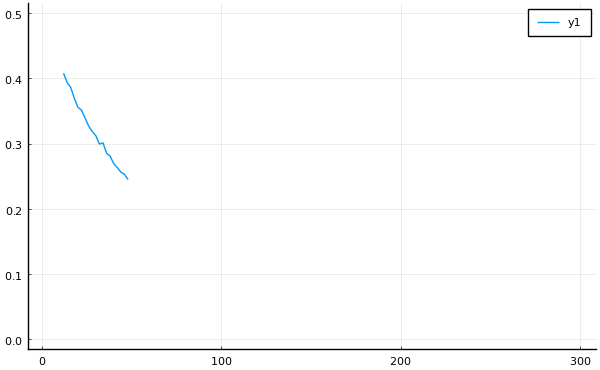

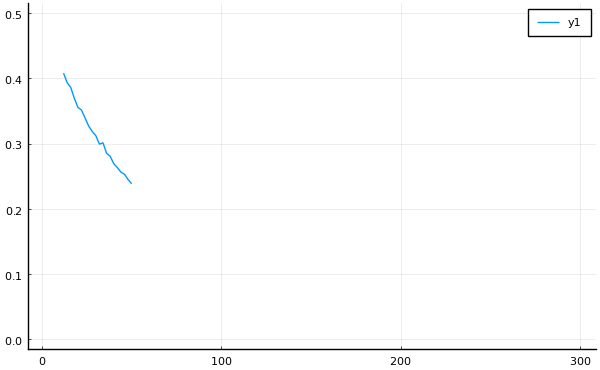

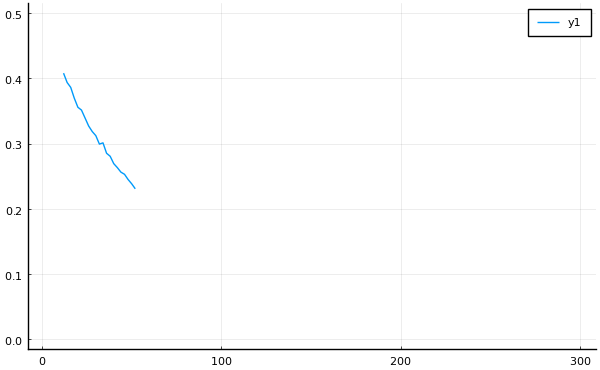

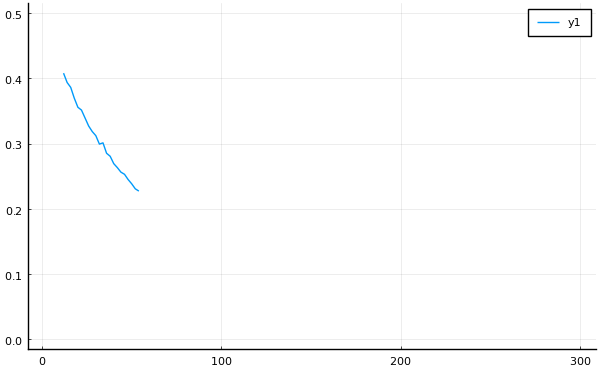

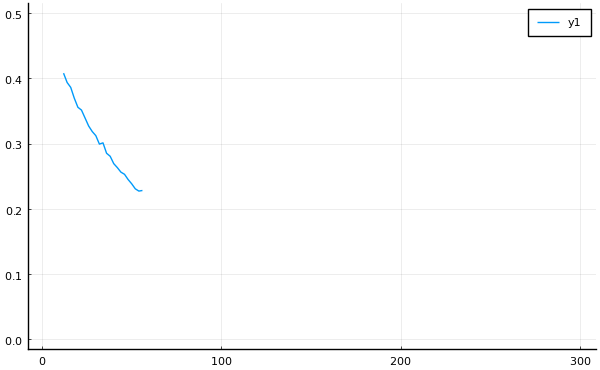

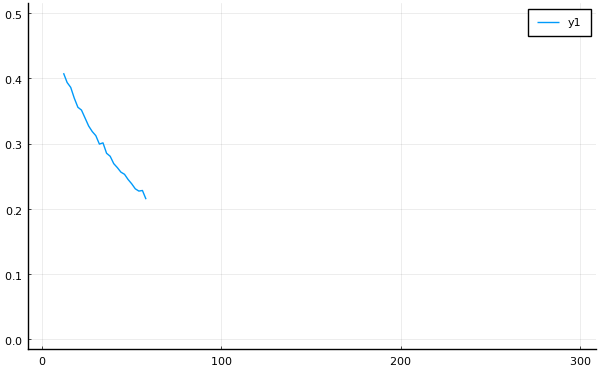

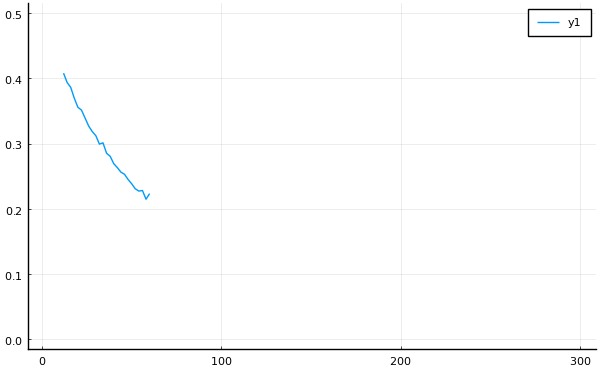

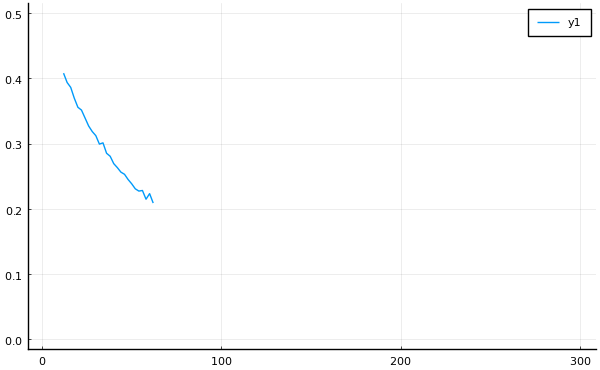

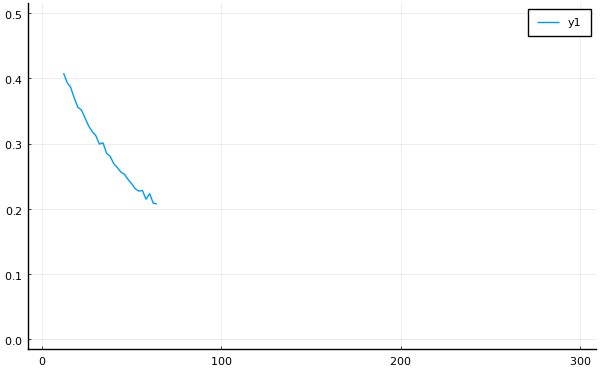

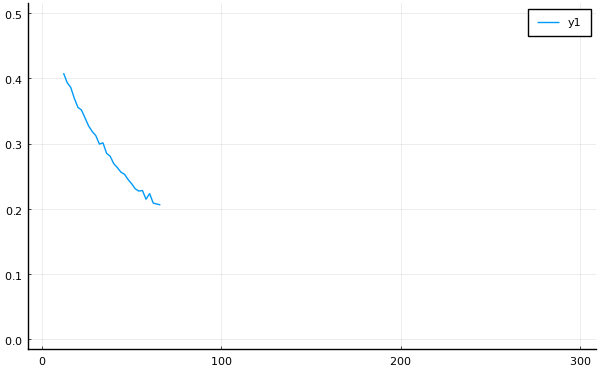

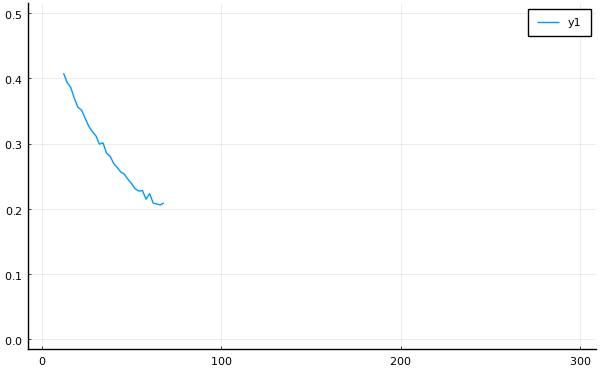

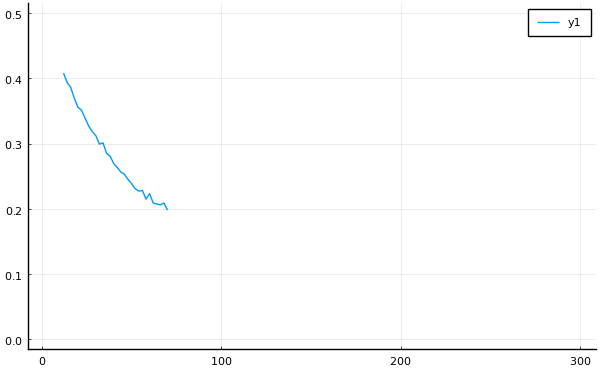

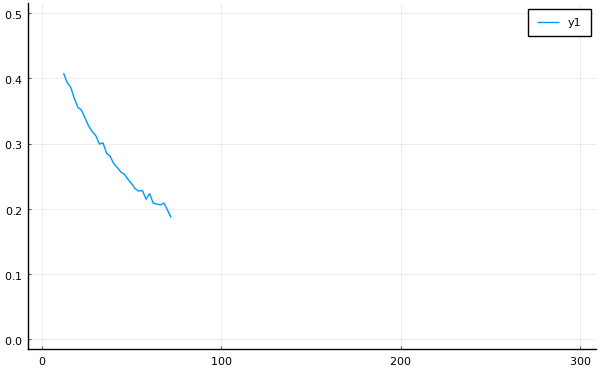

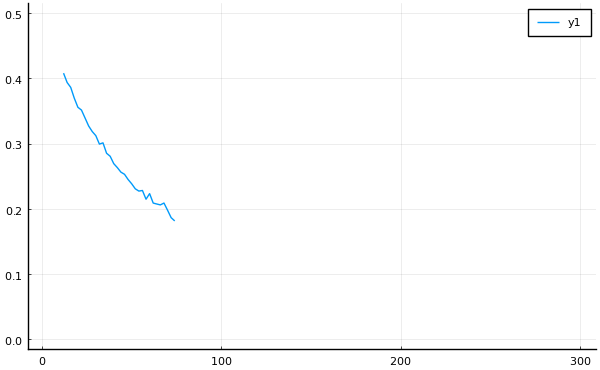

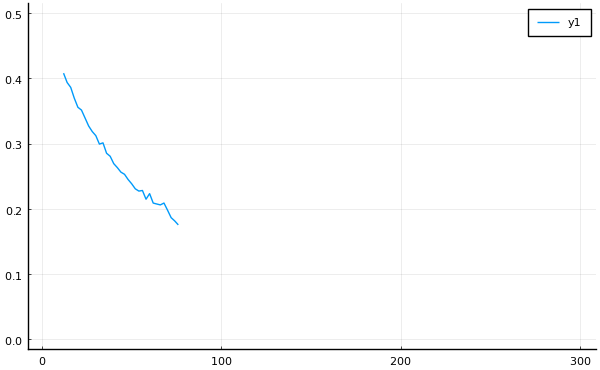

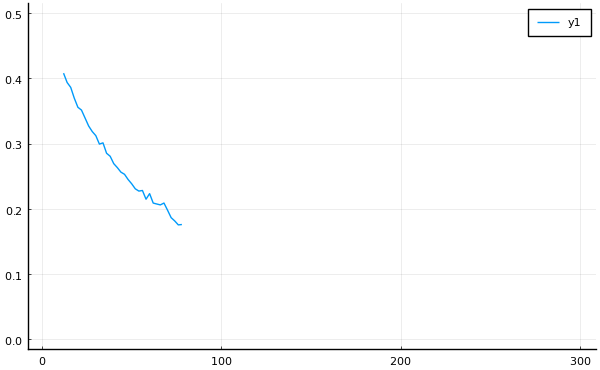

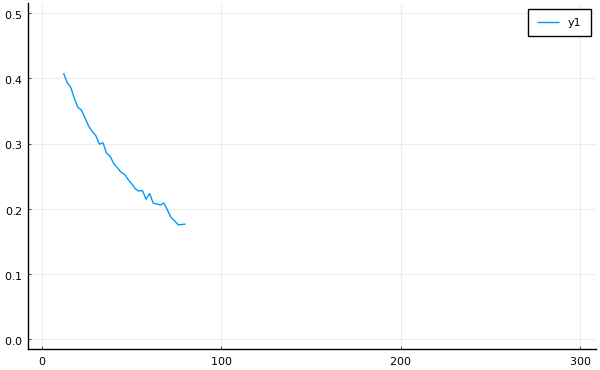

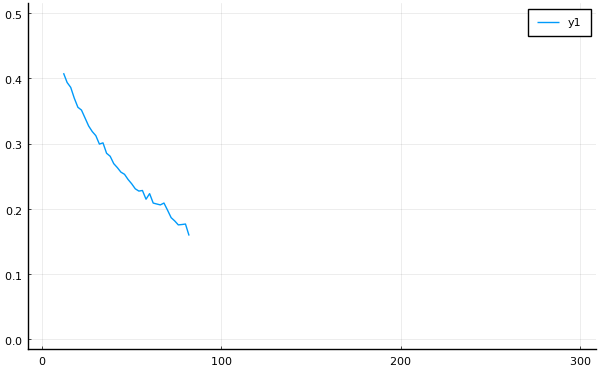

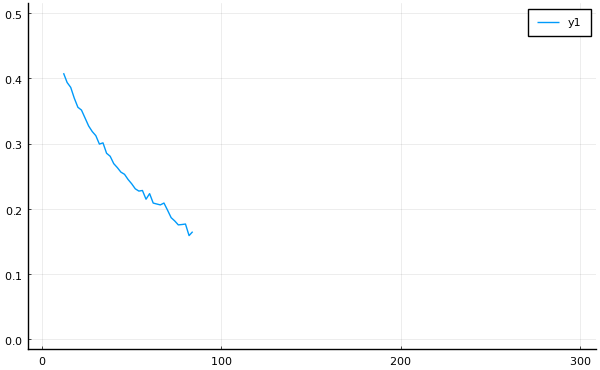

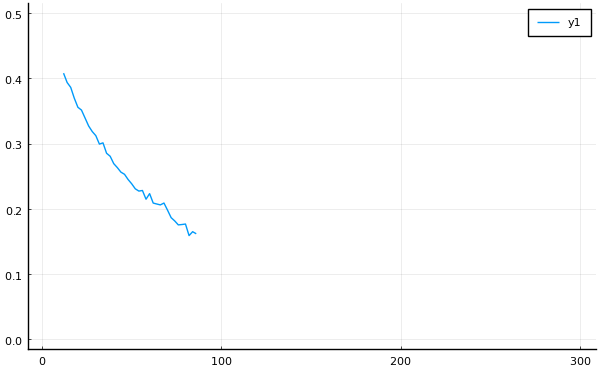

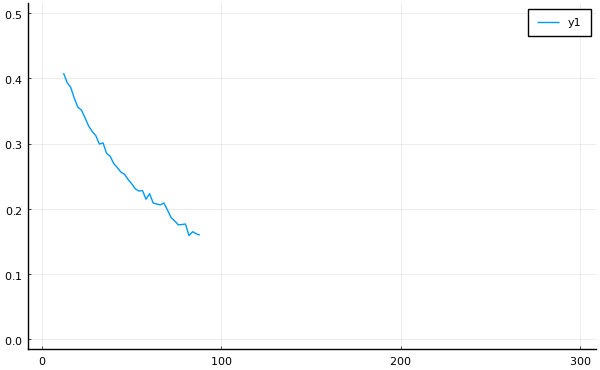

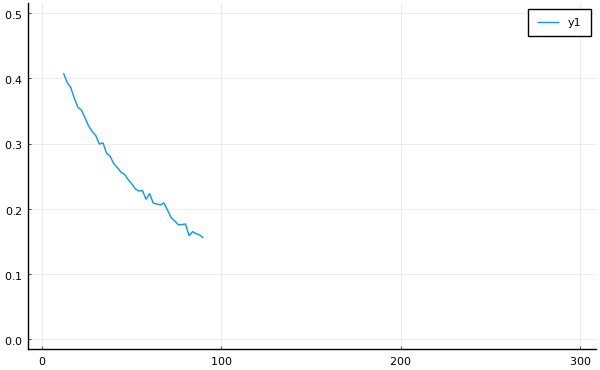

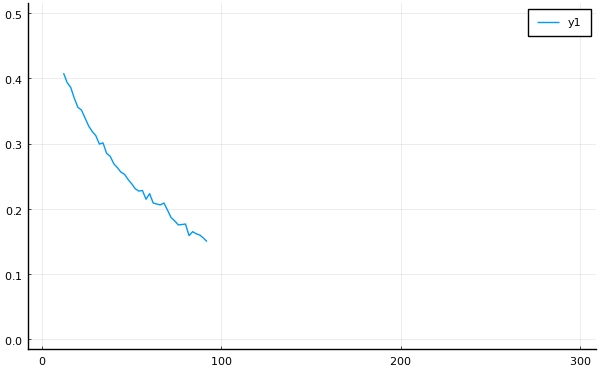

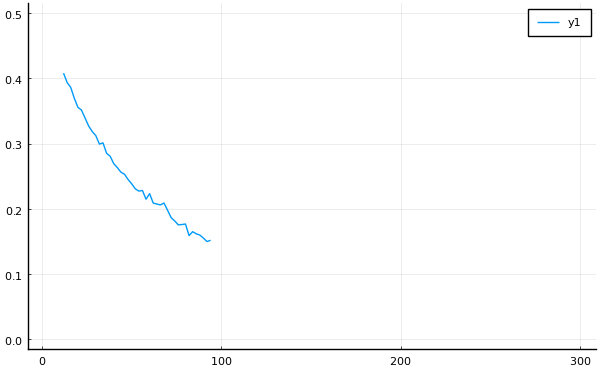

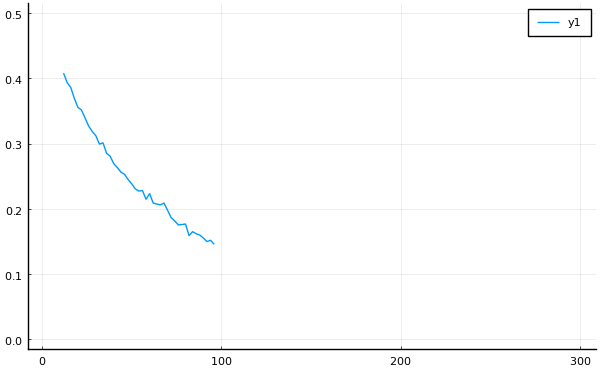

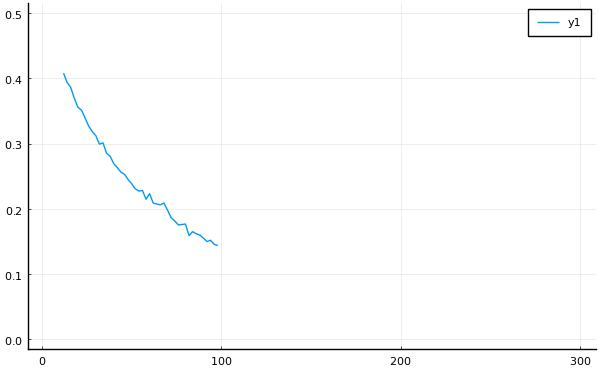

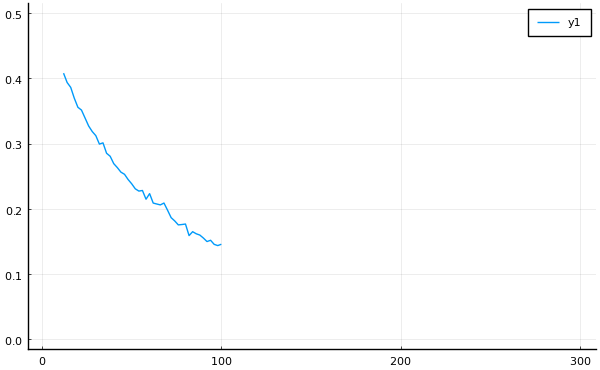

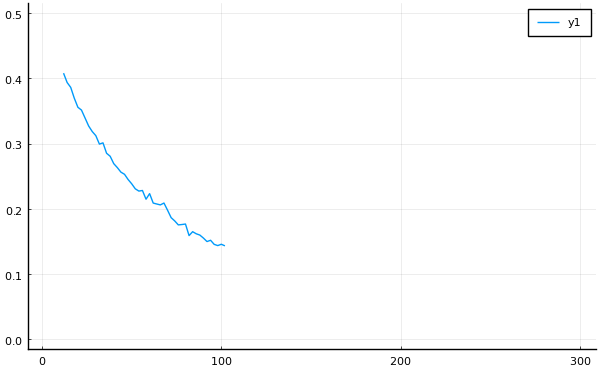

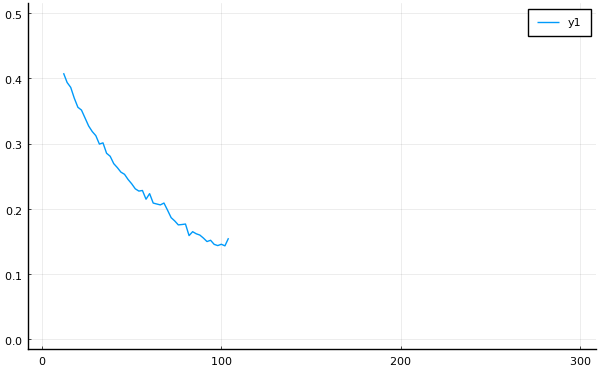

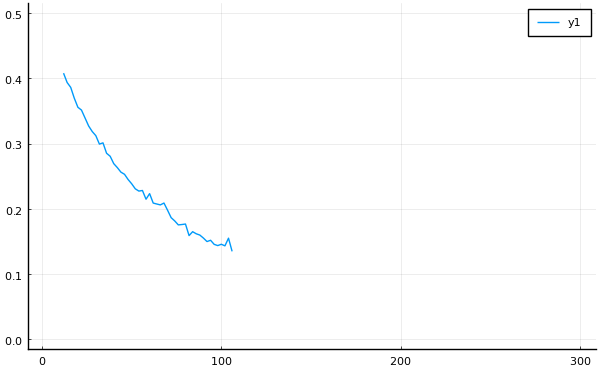

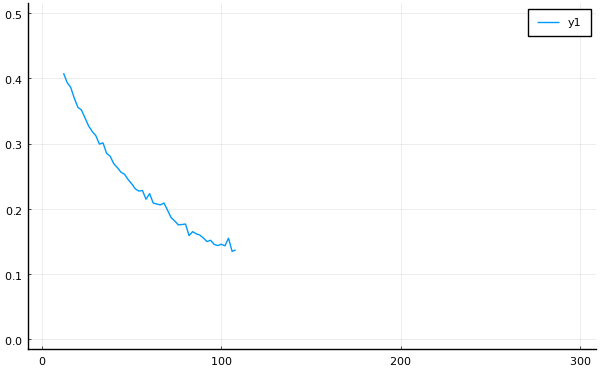

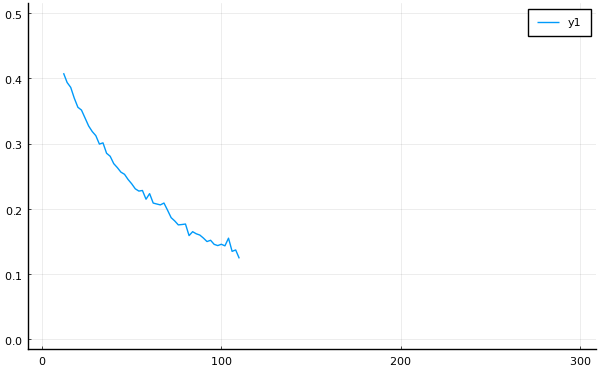

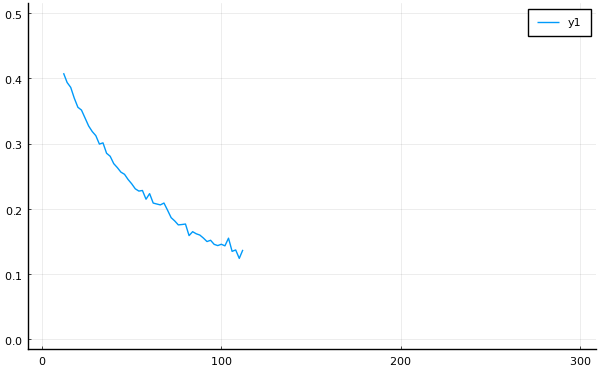

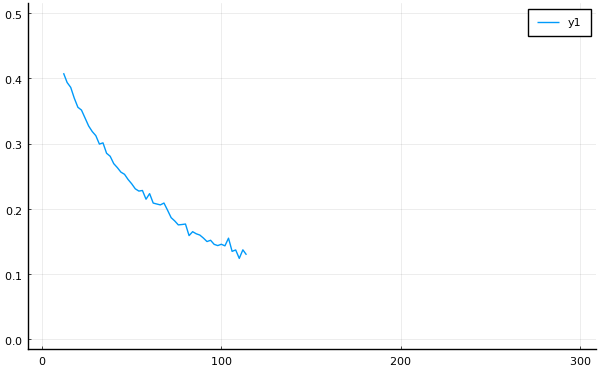

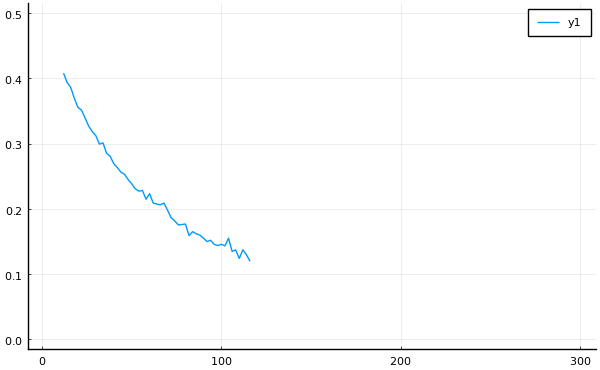

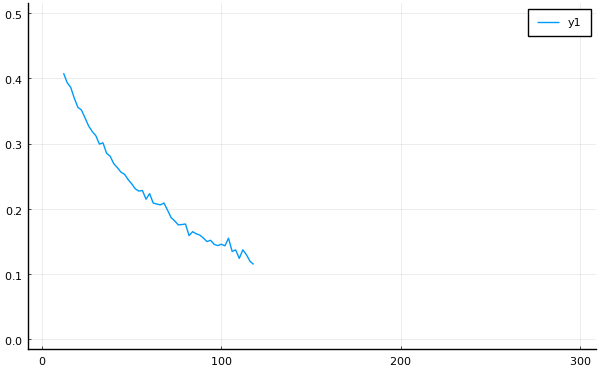

Machine{ProbabilisticIteratedModel{EvoTreeClassifier{Float32,…}},…} @502 trained 1 time; does not cache data
  args: 
    1:	Source @685 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @893 ⏎ `AbstractArray{Multiclass{2},1}`


In [3]:
EvoTreeClassifier = @load EvoTreeClassifier verbosity=0

model = EvoTreeClassifier(rng=123, η=0.005)

iterations = Int[0]
losses = Float64[0]

function update_plot(loss)
    push!(losses, loss)
    plot(iterations[2:end],
         losses[2:end],
         xlim=[1,300],
         ylim=[0,0.5]) |> display
end

imodel = IteratedModel(model=model,
                       resampling=Holdout(rng=123),
                       measures=[brier_loss, log_loss],
                       iteration_parameter=:nrounds,
                       controls=[Step(2),
                                 WithIterationsDo(i->push!(iterations, i)),
                                 WithLossDo(update_plot),
                                 GL(200),
                                 TimeLimit(Second(30))])

mach = machine(imodel, X, y) |> fit!

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*